In [23]:
# import data

import re
import pandas as pd
import numpy as np
import sqlite3

# read database, change path and database name if needed
conn = sqlite3.connect('final_db_2.db')
cursor = conn.cursor()
result = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

In [24]:
# find table names - match data
table_names = sorted(list(zip(*result))[0])

# create first table
test_name = table_names[0]
data = pd.read_sql("SELECT * FROM '{}'".format(test_name), conn)

# append all match stats to one table
for name in table_names[1:]:
    data_i = pd.read_sql("SELECT * FROM '{}'".format(name), conn)
    data = pd.concat([data, data_i])

In [25]:
data = data.drop(columns = ['Team_name_home', 'Round_home', 'Team_name_away', 'Year_away', 'Round_away', 
                            'Results_away', 'Round_diff', 'Year_diff', 'Team_name_diff' ]) 
# only need result home 

In [26]:
data[data.isna().any(axis=1)]

,AVG_1_Points_home,AVG_1_Serve_number_home,AVG_1_Serve_errors_home,AVG_1_Serve_aces_home,AVG_1_Serve_%_effic_home,AVG_1_Rec_number_home,AVG_1_Rec_errors_home,AVG_1_Rec_%_pos_home,AVG_1_Rec_%_perf_home,AVG_1_Atack_number_home,...,Last_3_Points_lost_diff,Last_5_Points_diff,Last_5_Matches_won_diff,Last_5_Matches_lost_diff,Last_5_Sets_won_diff,Last_5_Sets_lost_diff,Last_5_Points_won_diff,Last_5_Points_lost_diff,%_points_poss_home,%_points_poss_away
687,55.0,76.0,13.0,4.0,-0.12,45.0,5.0,55.0,31.0,69.0,...,-12.0,3.0,1.0,-1.0,3.0,-3.0,24.0,-12.0,0.50,0.00
695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-25.0,4.0,2.0,-2.0,4.0,-4.0,15.0,-25.0,0.56,0.11
916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,-3.0,-1.0,1.0,-3.0,3.0,-14.0,17.0,0.00,0.50
921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,-3.0,-1.0,1.0,-3.0,3.0,-20.0,17.0,0.00,0.50
925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,-3.0,-1.0,1.0,-3.0,3.0,-13.0,6.0,0.33,0.67
1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-88.0,-3.0,-1.0,0.0,-3.0,-1.0,-98.0,-88.0,0.00,0.50
1298,69.0,104.0,16.0,3.0,-0.12,81.0,5.0,49.0,25.0,108.0,...,8.0,1.0,0.0,0.0,1.0,0.0,13.0,8.0,0.17,0.00
1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,3.0,1.0,-1.0,2.0,-2.0,9.0,-3.0,0.50,0.00
1459,72.0,107.0,26.0,8.0,-14.00,76.0,5.0,47.0,19.0,103.0,...,-13.0,1.0,1.0,-1.0,1.0,-1.0,-8.0,-13.0,0.33,0.17
1460,85.0,104.0,19.0,9.0,-4.00,97.0,6.0,40.0,13.0,136.0,...,-7.0,0.0,0.0,0.0,0.0,0.0,-9.0,-7.0,0.33,0.33


In [27]:
data = data.dropna()
# check missing values for each of the variables
data.isnull().sum()

AVG_1_Points_home           0
AVG_1_Serve_number_home     0
AVG_1_Serve_errors_home     0
AVG_1_Serve_aces_home       0
AVG_1_Serve_%_effic_home    0
                           ..
Last_5_Sets_lost_diff       0
Last_5_Points_won_diff      0
Last_5_Points_lost_diff     0
%_points_poss_home          0
%_points_poss_away          0
Length: 278, dtype: int64

In [28]:
data.head()

,AVG_1_Points_home,AVG_1_Serve_number_home,AVG_1_Serve_errors_home,AVG_1_Serve_aces_home,AVG_1_Serve_%_effic_home,AVG_1_Rec_number_home,AVG_1_Rec_errors_home,AVG_1_Rec_%_pos_home,AVG_1_Rec_%_perf_home,AVG_1_Atack_number_home,...,Last_3_Points_lost_diff,Last_5_Points_diff,Last_5_Matches_won_diff,Last_5_Matches_lost_diff,Last_5_Sets_won_diff,Last_5_Sets_lost_diff,Last_5_Points_won_diff,Last_5_Points_lost_diff,%_points_poss_home,%_points_poss_away
0,56.0,85.0,17.0,0.0,-0.20,87.0,7.0,55.0,28.0,115.0,...,32.0,-2.0,-1.0,1.0,0.0,2.0,37.0,32.0,0.11,0.33
1,33.0,55.0,10.0,3.0,-0.13,55.0,5.0,61.0,27.0,68.0,...,-26.0,-2.0,-1.0,1.0,-3.0,1.0,-49.0,-26.0,0.00,0.33
2,33.0,55.0,14.0,2.0,-0.22,58.0,5.0,44.0,22.0,72.0,...,-28.0,-1.0,0.0,0.0,-2.0,0.0,-47.0,-28.0,0.00,0.17
3,71.0,106.0,15.0,5.0,-0.09,87.0,2.0,70.0,43.0,138.0,...,60.0,-2.0,-1.0,1.0,-1.0,3.0,32.0,60.0,0.17,0.50
4,71.0,93.0,18.0,10.0,-0.09,81.0,3.0,56.0,38.0,117.0,...,-14.0,1.0,0.0,0.0,0.0,-1.0,-20.0,-14.0,0.50,0.33


In [29]:
# define columns' names
new_col2 = ['AVG_1_Points_home',
 'AVG_1_Serve_number_home',
 'AVG_1_Serve_errors_home',
 'AVG_1_Serve_aces_home',
 'AVG_1_Serve_%_effic_home',
 'AVG_1_Rec_number_home',
 'AVG_1_Rec_errors_home',
 'AVG_1_Rec_%_pos_home',
 'AVG_1_Rec_%_perf_home',
 'AVG_1_Atack_number_home',
 'AVG_1_Atack_error_home',
 'AVG_1_Atack_blocked_home',
 'AVG_1_Atack_%_eff_home',
 'AVG_1_Block_points_home',
 'AVG_1_Points_net_home',
 'AVG_3_Points_home',
 'AVG_3_Serve_number_home',
 'AVG_3_Serve_errors_home',
 'AVG_3_Serve_aces_home',
 'AVG_3_Serve_%_effic_home',
 'AVG_3_Rec_number_home',
 'AVG_3_Rec_errors_home',
 'AVG_3_Rec_%_pos_home',
 'AVG_3_Rec_%_perf_home',
 'AVG_3_Atack_number_home',
 'AVG_3_Atack_error_home',
 'AVG_3_Atack_blocked_home',
 'AVG_3_Atack_%_eff_home',
 'AVG_3_Block_points_home',
 'AVG_3_Points_net_home',
 'AVG_5_Points_home',
 'AVG_5_Serve_number_home',
 'AVG_5_Serve_errors_home',
 'AVG_5_Serve_aces_home',
 'AVG_5_Serve_%_effic_home',
 'AVG_5_Rec_number_home',
 'AVG_5_Rec_errors_home',
 'AVG_5_Rec_%_pos_home',
 'AVG_5_Rec_%_perf_home',
 'AVG_5_Atack_number_home',
 'AVG_5_Atack_error_home',
 'AVG_5_Atack_blocked_home',
 'AVG_5_Atack_%_eff_home',
 'AVG_5_Block_points_home',
 'AVG_5_Points_net_home',
 'Height_avg_home',
 'Weight_avg_home',
 'Range_avg_home',
 'Opposite_Height_home',
 'Libero_Height_home',
 'Outside_Height_home',
 'Setter_Height_home',
 'Middle_Height_home',
 'Opposite_Weight_home',
 'Libero_Weight_home',
 'Outside_Weight_home',
 'Setter_Weight_home',
 'Middle_Weight_home',
 'Opposite_Range_home',
 'Libero_Range_home',
 'Outside_Range_home',
 'Setter_Range_home',
 'Middle_Range_home',
 'Points_home',
 'Matches_won_home',
 'Matches_lost_home',
 'Sets_won_home',
 'Sets_lost_home',
 'Points_won_home',
 'Points_lost_home',
 'Last_1_Points_home',
 'Last_1_Matches_won_home',
 'Last_1_Matches_lost_home',
 'Last_1_Sets_won_home',
 'Last_1_Sets_lost_home',
 'Last_1_Points_won_home',
 'Last_1_Points_lost_home',
 'Last_3_Points_home',
 'Last_3_Matches_won_home',
 'Last_3_Matches_lost_home',
 'Last_3_Sets_won_home',
 'Last_3_Sets_lost_home',
 'Last_3_Points_won_home',
 'Last_3_Points_lost_home',
 'Last_5_Points_home',
 'Last_5_Matches_won_home',
 'Last_5_Matches_lost_home',
 'Last_5_Sets_won_home',
 'Last_5_Sets_lost_home',
 'Last_5_Points_won_home',
 'Last_5_Points_lost_home',
 'ID',
 'Year_home',
 'Results_home',
 'AVG_1_Points_away',
 'AVG_1_Serve_number_away',
 'AVG_1_Serve_errors_away',
 'AVG_1_Serve_aces_away',
 'AVG_1_Serve_%_effic_away',
 'AVG_1_Rec_number_away',
 'AVG_1_Rec_errors_away',
 'AVG_1_Rec_%_pos_away',
 'AVG_1_Rec_%_perf_away',
 'AVG_1_Atack_number_away',
 'AVG_1_Atack_error_away',
 'AVG_1_Atack_blocked_away',
 'AVG_1_Atack_%_eff_away',
 'AVG_1_Block_points_away',
 'AVG_1_Points_net_away',
 'AVG_3_Points_away',
 'AVG_3_Serve_number_away',
 'AVG_3_Serve_errors_away',
 'AVG_3_Serve_aces_away',
 'AVG_3_Serve_%_effic_away',
 'AVG_3_Rec_number_away',
 'AVG_3_Rec_errors_away',
 'AVG_3_Rec_%_pos_away',
 'AVG_3_Rec_%_perf_away',
 'AVG_3_Atack_number_away',
 'AVG_3_Atack_error_away',
 'AVG_3_Atack_blocked_away',
 'AVG_3_Atack_%_eff_away',
 'AVG_3_Block_points_away',
 'AVG_3_Points_net_away',
 'AVG_5_Points_away',
 'AVG_5_Serve_number_away',
 'AVG_5_Serve_errors_away',
 'AVG_5_Serve_aces_away',
 'AVG_5_Serve_%_effic_away',
 'AVG_5_Rec_number_away',
 'AVG_5_Rec_errors_away',
 'AVG_5_Rec_%_pos_away',
 'AVG_5_Rec_%_perf_away',
 'AVG_5_Atack_number_away',
 'AVG_5_Atack_error_away',
 'AVG_5_Atack_blocked_away',
 'AVG_5_Atack_%_eff_away',
 'AVG_5_Block_points_away',
 'AVG_5_Points_net_away',
 'Height_avg_away',
 'Weight_avg_away',
 'Range_avg_away',
 'Opposite_Height_away',
 'Libero_Height_away',
 'Outside_Height_away',
 'Setter_Height_away',
 'Middle_Height_away',
 'Opposite_Weight_away',
 'Libero_Weight_away',
 'Outside_Weight_away',
 'Setter_Weight_away',
 'Middle_Weight_away',
 'Opposite_Range_away',
 'Libero_Range_away',
 'Outside_Range_away',
 'Setter_Range_away',
 'Middle_Range_away',
 'Points_away',
 'Matches_won_away',
 'Matches_lost_away',
 'Sets_won_away',
 'Sets_lost_away',
 'Points_won_away',
 'Points_lost_away',
 'Last_1_Points_away',
 'Last_1_Matches_won_away',
 'Last_1_Matches_lost_away',
 'Last_1_Sets_won_away',
 'Last_1_Sets_lost_away',
 'Last_1_Points_won_away',
 'Last_1_Points_lost_away',
 'Last_3_Points_away',
 'Last_3_Matches_won_away',
 'Last_3_Matches_lost_away',
 'Last_3_Sets_won_away',
 'Last_3_Sets_lost_away',
 'Last_3_Points_won_away',
 'Last_3_Points_lost_away',
 'Last_5_Points_away',
 'Last_5_Matches_won_away',
 'Last_5_Matches_lost_away',
 'Last_5_Sets_won_away',
 'Last_5_Sets_lost_away',
 'Last_5_Points_won_away',
 'Last_5_Points_lost_away',
 'AVG_1_Points_diff',
 'AVG_1_Serve_number_diff',
 'AVG_1_Serve_errors_diff',
 'AVG_1_Serve_aces_diff',
 'AVG_1_Serve_%_effic_diff',
 'AVG_1_Rec_number_diff',
 'AVG_1_Rec_errors_diff',
 'AVG_1_Rec_%_pos_diff',
 'AVG_1_Rec_%_perf_diff',
 'AVG_1_Atack_number_diff',
 'AVG_1_Atack_error_diff',
 'AVG_1_Atack_blocked_diff',
 'AVG_1_Atack_%_eff_diff',
 'AVG_1_Block_points_diff',
 'AVG_1_Points_net_diff',
 'AVG_3_Points_diff',
 'AVG_3_Serve_number_diff',
 'AVG_3_Serve_errors_diff',
 'AVG_3_Serve_aces_diff',
 'AVG_3_Serve_%_effic_diff',
 'AVG_3_Rec_number_diff',
 'AVG_3_Rec_errors_diff',
 'AVG_3_Rec_%_pos_diff',
 'AVG_3_Rec_%_perf_diff',
 'AVG_3_Atack_number_diff',
 'AVG_3_Atack_error_diff',
 'AVG_3_Atack_blocked_diff',
 'AVG_3_Atack_%_eff_diff',
 'AVG_3_Block_points_diff',
 'AVG_3_Points_net_diff',
 'AVG_5_Points_diff',
 'AVG_5_Serve_number_diff',
 'AVG_5_Serve_errors_diff',
 'AVG_5_Serve_aces_diff',
 'AVG_5_Serve_%_effic_diff',
 'AVG_5_Rec_number_diff',
 'AVG_5_Rec_errors_diff',
 'AVG_5_Rec_%_pos_diff',
 'AVG_5_Rec_%_perf_diff',
 'AVG_5_Atack_number_diff',
 'AVG_5_Atack_error_diff',
 'AVG_5_Atack_blocked_diff',
 'AVG_5_Atack_%_eff_diff',
 'AVG_5_Block_points_diff',
 'AVG_5_Points_net_diff',
 'Height_avg_diff',
 'Weight_avg_diff',
 'Range_avg_diff',
 'Opposite_Height_diff',
 'Libero_Height_diff',
 'Outside_Height_diff',
 'Setter_Height_diff',
 'Middle_Height_diff',
 'Opposite_Weight_diff',
 'Libero_Weight_diff',
 'Outside_Weight_diff',
 'Setter_Weight_diff',
 'Middle_Weight_diff',
 'Opposite_Range_diff',
 'Libero_Range_diff',
 'Outside_Range_diff',
 'Setter_Range_diff',
 'Middle_Range_diff',
 'Points_diff',
 'Matches_won_diff',
 'Matches_lost_diff',
 'Sets_won_diff',
 'Sets_lost_diff',
 'Points_won_diff',
 'Points_lost_diff',
 'Last_1_Points_diff',
 'Last_1_Matches_won_diff',
 'Last_1_Matches_lost_diff',
 'Last_1_Sets_won_diff',
 'Last_1_Sets_lost_diff',
 'Last_1_Points_won_diff',
 'Last_1_Points_lost_diff',
 'Last_3_Points_diff',
 'Last_3_Matches_won_diff',
 'Last_3_Matches_lost_diff',
 'Last_3_Sets_won_diff',
 'Last_3_Sets_lost_diff',
 'Last_3_Points_won_diff',
 'Last_3_Points_lost_diff',
 'Last_5_Points_diff',
 'Last_5_Matches_won_diff',
 'Last_5_Matches_lost_diff',
 'Last_5_Sets_won_diff',
 'Last_5_Sets_lost_diff',
 'Last_5_Points_won_diff',
 'Last_5_Points_lost_diff',
 '%_points_poss_home',
 '%_points_poss_away',
 '%_points_poss_diff']

In [30]:
data['%_points_poss_diff'] = data['%_points_poss_home'] - data['%_points_poss_away']

In [31]:
data.columns = new_col2

In [32]:
# define column with the result
df1 = data.pop('Results_home') 
data['Result']=df1 

In [33]:
in_sample = data[data['Year_home'].isin(['2020/2021', '2019/2020', '2018/2019', '2017/2018', '2016/2017', '2015/2016', '2014/2015', '2013/2014', 
        '2012/2013', '2011/2012', '2010/2011'])]

In [34]:
labels = in_sample.pop('Result')

In [35]:
in_sample = in_sample.drop(columns=['ID', 'Year_home'])

In [36]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(in_sample, labels, test_size = 0.3, random_state = 30)

In [37]:
out_of_time = data[data['Year_home'] == ('2021/2022')]

In [38]:
y_oot = out_of_time['Result']

In [39]:
X_oot = out_of_time.drop(columns=['ID', 'Result', 'Year_home'])

In [40]:
print(y_train.value_counts(normalize=True))  
print(y_test.value_counts(normalize=True))
print(y_oot.value_counts(normalize=True))

1.0    0.53257
0.0    0.46743
Name: Result, dtype: float64
1.0    0.561475
0.0    0.438525
Name: Result, dtype: float64
1.0    0.525714
0.0    0.474286
Name: Result, dtype: float64


In [41]:
from keras import metrics
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.optimizers import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [42]:
metrics = ['accuracy']

epochs = [24]

learning_rate = [0.001, 0.01, 0.1]

dropout = [0.05, 0.1, 0.2]

activation_final = ['sigmoid', 'softmax']

activation = ['relu', 'sigmoid', 'softmax', 'tanh']

optimizer = [Adam, SGD]

In [43]:
parameters0 = dict(metrics = metrics,
                  epochs = epochs,
                  dropout = dropout,
                  learning_rate = learning_rate,
                  activation = activation,
                  activation_final = activation_final,
                  optimizer = optimizer)

In [44]:
def build_model0(activation, dropout, activation_final, learning_rate, epochs,
                optimizer, metrics):
    model = Sequential([
      layers.Dense(276, activation=activation),
      layers.Dropout(dropout),
      layers.Dense(276, activation=activation),
      layers.Dropout(dropout),
      layers.Dense(276, activation=activation),
      layers.Dropout(dropout),
      layers.Dense(276, activation=activation),
      layers.Dropout(dropout),
      layers.Dense(1, name="outputs", activation=activation_final),

    ])
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(lr=learning_rate),
                  metrics=metrics)
    return model


In [45]:
model_GridSearch0 = KerasClassifier(build_fn=build_model0, verbose=1)
nn = GridSearchCV(estimator=model_GridSearch0, param_grid=parameters0, n_jobs=1, cv=3, verbose = 1)

<ipython-input-45-2003982fa98f>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_GridSearch0 = KerasClassifier(build_fn=build_model0, verbose=1)


In [46]:
nn_result = nn.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Epoch 1/24


C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 16.0657 - accuracy: 0.5099
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 2.5583 - accuracy: 0.5786
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 1.1911 - accuracy: 0.6037
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 1.3095 - accuracy: 0.5733
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.9856 - accuracy: 0.6209
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8130 - accuracy: 0.6420
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8182 - accuracy: 0.6156
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7557 - accuracy: 0.6380
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8015 - accuracy: 0.6235
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7656 - accuracy: 0.6262
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 20.0376 - accuracy: 0.5443
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.8236 - accuracy: 0.5799
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1943 - accuracy: 0.5971
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0609 - accuracy: 0.6394
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0498 - accuracy: 0.6077
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0034 - accuracy: 0.5958
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8850 - accuracy: 0.6103
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7712 - accuracy: 0.6367
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7461 - accuracy: 0.6380
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7116 - accuracy: 0.6671
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 15.8265 - accuracy: 0.4710
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.0096 - accuracy: 0.5858
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2357 - accuracy: 0.6135
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2074 - accuracy: 0.6069
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0407 - accuracy: 0.6069
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9293 - accuracy: 0.6319
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9002 - accuracy: 0.6517
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7699 - accuracy: 0.6689
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7486 - accuracy: 0.6596
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7834 - accuracy: 0.6412
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 35.1909 - accuracy: 0.5403
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2114 - accuracy: 0.5561
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.9161 - accuracy: 0.5773
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9427 - accuracy: 0.5720
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8528 - accuracy: 0.5852
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8063 - accuracy: 0.6037
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7491 - accuracy: 0.6209
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7689 - accuracy: 0.5984
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7214 - accuracy: 0.6248
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.6248
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 32.6268 - accuracy: 0.4967
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 1.3001 - accuracy: 0.5152
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 1.0838 - accuracy: 0.5310
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8905 - accuracy: 0.5720
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8567 - accuracy: 0.5786
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8516 - accuracy: 0.5654
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8660 - accuracy: 0.5720
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7239 - accuracy: 0.6156
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.6380
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7997 - accuracy: 0.6169
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: 32.3259 - accuracy: 0.4987
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 1.1643 - accuracy: 0.5765
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8944 - accuracy: 0.6029
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.9538 - accuracy: 0.5699
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.6148
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7493 - accuracy: 0.6346
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.6398
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.6491
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7471 - accuracy: 0.6306
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.6609
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 69.7748 - accuracy: 0.5152
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7405 - accuracy: 0.5799
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6420
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6684
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6750
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.6856
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6777
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.6896
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6446
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5945
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 70.9132 - accuracy: 0.4941
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7344 - accuracy: 0.5152
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7240 - accuracy: 0.5112
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5997
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6248
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.6671
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.6724
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.6513
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.6803
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.6354
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 120.0694 - accuracy: 0.5040
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7516 - accuracy: 0.5673
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6412
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.6675
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6517
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.6728
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.6966
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.6900
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.6939
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7005
Epoch 11/24
24/24 [=========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4518
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4954
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4960
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 217330.8281 - accuracy: 0.5099
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 9.0820 - accuracy: 0.5575
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 14.0268 - accuracy: 0.5601
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 3.7146 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 9.2894 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 7.8380 - accuracy: 0.5561
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3798 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8621 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 3.1205 - accuracy: 0.5575
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5588
Epoch 11/24
24/24 [=====

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 506598.1562 - accuracy: 0.5390
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 29.7222 - accuracy: 0.5046
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 11/24
24/24 [=====

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 495025.7188 - accuracy: 0.5277
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.4881
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 13.5602 - accuracy: 0.4947
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 19.3461 - accuracy: 0.4551
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4960
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4842
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4631
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5211
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4868
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5013
Epoch 11/24
24/24 [====

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4439
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4941
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 18.6296 - accuracy: 0.5178
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 3.4844 - accuracy: 0.5641
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 2.5502 - accuracy: 0.5337
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 1.6878 - accuracy: 0.5760
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 1.3765 - accuracy: 0.5786
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 1.1806 - accuracy: 0.6011
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 1.1580 - accuracy: 0.5733
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 1.0838 - accuracy: 0.6301
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.9828 - accuracy: 0.5918
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8774 - accuracy: 0.5997
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 17.9021 - accuracy: 0.5746
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 3.0897 - accuracy: 0.5469
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 2.1695 - accuracy: 0.5495
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 1.5672 - accuracy: 0.5945
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 1.2694 - accuracy: 0.6024
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 1.0325 - accuracy: 0.6116
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.9964 - accuracy: 0.6063
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8590 - accuracy: 0.6275
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8084 - accuracy: 0.6196
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7831 - accuracy: 0.6341
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 21.5275 - accuracy: 0.4960
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 3.6051 - accuracy: 0.5594
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 2.2368 - accuracy: 0.5871
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 1.8115 - accuracy: 0.5739
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 1.1962 - accuracy: 0.6240
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 1.2584 - accuracy: 0.6214
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 1.0964 - accuracy: 0.6306
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 1.0793 - accuracy: 0.6346
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 1.0449 - accuracy: 0.5871
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8761 - accuracy: 0.6003
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 29.7756 - accuracy: 0.4941
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4290 - accuracy: 0.5509
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2901 - accuracy: 0.5244
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1076 - accuracy: 0.5641
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0159 - accuracy: 0.5773
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9754 - accuracy: 0.5812
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9481 - accuracy: 0.5839
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8936 - accuracy: 0.5812
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8532 - accuracy: 0.5614
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8774 - accuracy: 0.5456
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 20.8099 - accuracy: 0.5020
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.9256 - accuracy: 0.5139
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3188 - accuracy: 0.5575
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2359 - accuracy: 0.5337
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0557 - accuracy: 0.5641
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9356 - accuracy: 0.5760
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8391 - accuracy: 0.6116
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7872 - accuracy: 0.6367
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7810 - accuracy: 0.6156
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7793 - accuracy: 0.6063
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 25.7026 - accuracy: 0.5106
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.6741 - accuracy: 0.5449
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2352 - accuracy: 0.5726
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2022 - accuracy: 0.5449
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9860 - accuracy: 0.5726
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9529 - accuracy: 0.5897
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8985 - accuracy: 0.5884
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9123 - accuracy: 0.5752
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9207 - accuracy: 0.5792
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8802 - accuracy: 0.5884
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 57.5342 - accuracy: 0.5165
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8470 - accuracy: 0.5667
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.6394
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.6209
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.6697
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6245 - accuracy: 0.6724
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.6764
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.5933 - accuracy: 0.6909
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.6750
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.6790
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 72.9288 - accuracy: 0.5139
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7376 - accuracy: 0.4822
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.5046
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5997
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.6011
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.6526
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.6711
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6248 - accuracy: 0.6367
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6473
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6060 - accuracy: 0.6631
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 65.9520 - accuracy: 0.4723
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7762 - accuracy: 0.5554
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5818
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.6082
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.6504
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6834
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6478
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6794
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.6728
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6755
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4624
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4795
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4908
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 382189.9375 - accuracy: 0.5165
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.5244
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 4371.1274 - accuracy: 0.5694
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 15.0684 - accuracy: 0.5403
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5337
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5284
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5456
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5601
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5601
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5588
Epoch 11/24
24/24 [==

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 71163.6094 - accuracy: 0.5112
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 331.1238 - accuracy: 0.5086
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 44.5226 - accuracy: 0.4993
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 15.3554 - accuracy: 0.4980
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 18.2731 - accuracy: 0.4835
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 128.1045 - accuracy: 0.4888
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 95.0677 - accuracy: 0.5099
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 166.0516 - accuracy: 0.5231
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 2.2988 - accuracy: 0.5244
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 4.4725 - accuracy: 0.5218
Epoch 11/24
24/2

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 226806.1250 - accuracy: 0.5026
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 672.4250 - accuracy: 0.5158
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 240.2279 - accuracy: 0.5092
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 30.4956 - accuracy: 0.5290
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 15.8488 - accuracy: 0.5290
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 39.8679 - accuracy: 0.5053
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 7.4929 - accuracy: 0.5198
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 4.3560 - accuracy: 0.5053
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 9.5549 - accuracy: 0.5145
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 6.4266 - accuracy: 0.4631
Epoch 11/24
24/24 

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4346
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4808
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4987
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 17.0756 - accuracy: 0.5390
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 6.9104 - accuracy: 0.5284
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 3.7901 - accuracy: 0.5443
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 2.0721 - accuracy: 0.5667
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.9318 - accuracy: 0.5390
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4506 - accuracy: 0.5892
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3608 - accuracy: 0.5839
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2645 - accuracy: 0.5601
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0724 - accuracy: 0.5548
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9579 - accuracy: 0.5984
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 18.8353 - accuracy: 0.4927
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 4.8385 - accuracy: 0.5495
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 2.8231 - accuracy: 0.5575
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 2.3984 - accuracy: 0.5205
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 1.6119 - accuracy: 0.5786
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 1.4424 - accuracy: 0.5918
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 1.3967 - accuracy: 0.5548
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 1.1123 - accuracy: 0.5997
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 1.0601 - accuracy: 0.5971
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.9676 - accuracy: 0.5773
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 26.2930 - accuracy: 0.5040
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 6.2219 - accuracy: 0.5409
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 3.4163 - accuracy: 0.5462
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 2.7381 - accuracy: 0.5699
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.9476 - accuracy: 0.6148
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.7574 - accuracy: 0.5752
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.5727 - accuracy: 0.6016
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2115 - accuracy: 0.6016
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0534 - accuracy: 0.6095
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1035 - accuracy: 0.5976
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 22.2317 - accuracy: 0.4941
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.5040 - accuracy: 0.5310
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.8794 - accuracy: 0.5258
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3533 - accuracy: 0.5694
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2562 - accuracy: 0.5522
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2407 - accuracy: 0.5165
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9873 - accuracy: 0.5720
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9064 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9195 - accuracy: 0.5720
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8630 - accuracy: 0.5733
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 17.5960 - accuracy: 0.5165
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 3.1497 - accuracy: 0.5416
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 2.3842 - accuracy: 0.5324
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.8343 - accuracy: 0.5310
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4937 - accuracy: 0.5139
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2643 - accuracy: 0.5482
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.5350
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0173 - accuracy: 0.5495
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8989 - accuracy: 0.5865
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9051 - accuracy: 0.5469
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 20.1988 - accuracy: 0.5224
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.8843 - accuracy: 0.5303
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 2.2171 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.6867 - accuracy: 0.5330
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 1.5030 - accuracy: 0.5369
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2420 - accuracy: 0.5528
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0703 - accuracy: 0.5383
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0237 - accuracy: 0.5699
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9552 - accuracy: 0.5633
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9302 - accuracy: 0.5686
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 86.3936 - accuracy: 0.4808
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7753 - accuracy: 0.5271
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5535
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5535
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5522
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5509
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5575
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.5654
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5588
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 61.5117 - accuracy: 0.4914
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1345 - accuracy: 0.4901
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7577 - accuracy: 0.5297
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7385 - accuracy: 0.5192
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.5192
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.5416
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5561
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5707
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5984
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.6248
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 57.7267 - accuracy: 0.4736
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8972 - accuracy: 0.5251
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7240 - accuracy: 0.5211
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5910
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.6319
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6474 - accuracy: 0.6108
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6504
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.6385
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6245 - accuracy: 0.6240
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6216 - accuracy: 0.6609
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4465
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4795
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4908
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 408944.8750 - accuracy: 0.5046
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 66.2446 - accuracy: 0.5376
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0675 - accuracy: 0.5509
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7477 - accuracy: 0.5205
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5258
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5443
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5390
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5363
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5561
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5588
Epoch 11/24
24/24 [=====

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 67068.2344 - accuracy: 0.5125
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7869 - accuracy: 0.5376
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 666.4120 - accuracy: 0.5099
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9379 - accuracy: 0.5139
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 4.8216 - accuracy: 0.5125
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 190.9026 - accuracy: 0.4941
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 320.8914 - accuracy: 0.5086
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.5231
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.4795
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5205
Epoch 11/24
24/24 [=

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 53296.8438 - accuracy: 0.4974
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 242.0159 - accuracy: 0.4921
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 171.7583 - accuracy: 0.4921
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 538.0578 - accuracy: 0.5026
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 242.3139 - accuracy: 0.5198
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 8.8991 - accuracy: 0.5158
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 46.5423 - accuracy: 0.5026
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 658.3112 - accuracy: 0.4855
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 29.3656 - accuracy: 0.4987
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 9.7494 - accuracy: 0.4868
Epoch 11/24
24

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4624
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4742
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4908
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 17.5763 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.9154 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.5915 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2422 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1732 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9654 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.9312 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.9265 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8247 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7997 - accuracy: 0.5588
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 14.0154 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.6218 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2232 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0744 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0140 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8883 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7960 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7353 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.5218
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 16.5795 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.1748 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2962 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2626 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0652 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9622 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8859 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8573 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7807 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7900 - accuracy: 0.5172
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 28.3499 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2170 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0092 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8765 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8613 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8846 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8144 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7637 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7652 - accuracy: 0.5588
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 14.8200 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 1.4954 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 1.3739 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 1.1576 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9903 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8968 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9212 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8783 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7664 - accuracy: 0.5218
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 19.3856 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3910 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.9368 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0646 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8419 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8151 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7778 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7511 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.5172
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 94.8995 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7697 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6366 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6037 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.5588
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 75.7209 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7948 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7141 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7286 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6201 - accuracy: 0.5218
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 91.2245 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7615 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6143 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.5172
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4676
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4756
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 11/24
24/24 [==============================] - 0s 4ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.4855
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 158069.2969 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 22.5404 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 5.7892 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 13.6341 - accuracy: 0.5588
Epoch 11/24
24/24 [====

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 482588.9688 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 8.5140 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.7242 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 4.0920 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7505 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 11/24
24/24 [======

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 503125.0938 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 83.7548 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3851 - accuracy: 0.5172
Epoch 11/24
24/24 [=====

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4359
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4993
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4749
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 15.4674 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 2.7302 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 1.8418 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 1.4536 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 1.3351 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 1.3013 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.9820 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.9427 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8297 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8490 - accuracy: 0.5588
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 20.5700 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.4158 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.7684 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4229 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0990 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9673 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9059 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9387 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8558 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8215 - accuracy: 0.5218
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 17.0126 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 3.1586 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 2.0664 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4509 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2087 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1765 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0090 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9176 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9918 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8087 - accuracy: 0.5172
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 15.6846 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.7583 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3373 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1912 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1626 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0213 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9214 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8548 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8989 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8867 - accuracy: 0.5588
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 17.6155 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.3215 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3903 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3764 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1051 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0543 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9468 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9253 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9110 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8115 - accuracy: 0.5218
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 25.0445 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.6090 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2424 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3023 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0149 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9430 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8699 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8272 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7748 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7743 - accuracy: 0.5172
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 65.2034 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7683 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6024 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.5960 - accuracy: 0.5588
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 109.7586 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8137 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7095 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6283 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.5218
Epoch 11/24
24/24 [=========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 107.5105 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9033 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7441 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7217 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6614 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6346 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6255 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.5863 - accuracy: 0.5172
Epoch 11/24
24/24 [=========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4597
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.5020
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4782
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4782
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 11/24
24/24 [==============================] - 0s 4ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.4776
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4828
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 396498.6875 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 53.6838 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.5588
Epoch 11/24
24/24 [=====

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 316548.8750 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 14.7594 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3312 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 23.3070 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7133 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7853 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8504 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5218
Epoch 11/24
24/24 [====

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 294592.8438 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1624.2344 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 7.4222 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 12.0180 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 4.6358 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.9005 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 6.2827 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 4.7314 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 22.6412 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 2.1583 - accuracy: 0.5172
Epoch 11/24
24/24 [=

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4703
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4756
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 18.3502 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 5.1603 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 3.2783 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 2.6445 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 2.0334 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.5175 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 1.3111 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 1.2245 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 1.0829 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8595 - accuracy: 0.5588
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 18.6811 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 6.4113 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 3.3395 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 2.3104 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.7652 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4798 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2304 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1618 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0593 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9531 - accuracy: 0.5218
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 14.6776 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 6.1284 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 3.3215 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 2.3481 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.5805 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3296 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1379 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9799 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9233 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8496 - accuracy: 0.5172
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 20.8551 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 3.4483 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 2.1911 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.6705 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3103 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0364 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9969 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9383 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8406 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8289 - accuracy: 0.5588
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 34.3224 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.1992 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4623 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2474 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1490 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9597 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9581 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8030 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8929 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7921 - accuracy: 0.5218
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 19.6459 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.7050 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.9189 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4875 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4238 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2575 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1904 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0190 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9741 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8796 - accuracy: 0.5172
Epoch 11/24
24/24 [==========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 100.0458 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8338 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7264 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5588
Epoch 11/24
24/24 [=========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 117.9338 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.9736 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.5218
Epoch 11/24
24/24 [=========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 144.0835 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0323 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7185 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.5172
Epoch 11/24
24/24 [=========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4439
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4412
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4835
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4782
Epoch 11/24
24/24 [==============================] - 0s 2ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4881
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4828
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4828
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.4828
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 198778.6250 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.1273 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 42.3368 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5588
Epoch 11/24
24/24 [=====

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 38923.6680 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 4.8720 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7863 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7059 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5218
Epoch 11/24
24/24 [=======

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 120076.4922 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 560.7028 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7354 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7301 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9715 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1058.2281 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8035 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 0.5172
Epoch 11/24
24/24 [=

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4280
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4412
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4756
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4782
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4828
Epoch 11/24
24/24 [==============================] - 0s 3ms/

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7189 - accuracy: 0.5310
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5561
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.5337
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5310
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5773
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6011
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.5892
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.6301
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.6063
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.6354
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7267 - accuracy: 0.5086
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4954
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.5112
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4967
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5125
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5469
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6644 - accuracy: 0.5918
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.5852
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.6499
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.6486
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.7118 - accuracy: 0.4934
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.4947
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5092
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5409
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5290
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.6029
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.6293
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.6398
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6615 - accuracy: 0.6148
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.6266
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7341 - accuracy: 0.4478
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.4901
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.4967
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5363
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5284
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5469
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5337
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5324
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5429
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5376
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7035 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5284
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5231
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5139
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.4742
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5033
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5310
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5178
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5244
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4927
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7219 - accuracy: 0.4815
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7082 - accuracy: 0.4908
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.4855
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5040
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5026
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.4908
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5317
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5211
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5422
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9508 - accuracy: 0.5178
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.5073
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7108 - accuracy: 0.5073
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5337
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5337
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5271
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.5112
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5350
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5390
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9433 - accuracy: 0.4888
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7137 - accuracy: 0.4888
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7055 - accuracy: 0.4993
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.5178
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7169 - accuracy: 0.4676
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7060 - accuracy: 0.4980
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7130 - accuracy: 0.4954
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7181 - accuracy: 0.4927
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7175 - accuracy: 0.4941
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7139 - accuracy: 0.5007
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8819 - accuracy: 0.5211
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.5053
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.4894
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.4987
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7183 - accuracy: 0.5026
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7167 - accuracy: 0.5119
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7056 - accuracy: 0.4710
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.4921
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.5106
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7274 - accuracy: 0.4617
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7201 - accuracy: 0.5416
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5535
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5535
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5509
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5363
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5350
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5456
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5456
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5535
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5324
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.5073
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5073
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5561
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.4888
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5205
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.5205
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5258
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.4637
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.5112
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5007
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6979 - accuracy: 0.5145
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.5026
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4987
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.4921
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4974
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5185
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.4987
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.4947
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5330
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5264
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.5256 - accuracy: 0.4941
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8445 - accuracy: 0.5086
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7627 - accuracy: 0.5192
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7639 - accuracy: 0.5020
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8009 - accuracy: 0.4980
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9253 - accuracy: 0.5125
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7971 - accuracy: 0.4993
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7746 - accuracy: 0.5178
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1148 - accuracy: 0.4848
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0398 - accuracy: 0.4690
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 2.3886 - accuracy: 0.5271
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1163 - accuracy: 0.4993
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8701 - accuracy: 0.5125
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8567 - accuracy: 0.4650
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7705 - accuracy: 0.5125
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8673 - accuracy: 0.4941
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9240 - accuracy: 0.4848
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7864 - accuracy: 0.4716
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0828 - accuracy: 0.5376
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8678 - accuracy: 0.4993
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.4977 - accuracy: 0.4815
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9849 - accuracy: 0.5026
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7630 - accuracy: 0.4921
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7393 - accuracy: 0.4802
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7754 - accuracy: 0.5026
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7284 - accuracy: 0.5079
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7289 - accuracy: 0.5119
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8213 - accuracy: 0.5066
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9679 - accuracy: 0.4842
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8089 - accuracy: 0.4934
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7728 - accuracy: 0.4967
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8210 - accuracy: 0.4808
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7864 - accuracy: 0.5007
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7669 - accuracy: 0.5178
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7526 - accuracy: 0.5456
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7492 - accuracy: 0.5205
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.5192
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7218 - accuracy: 0.5205
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7156 - accuracy: 0.5231
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7217 - accuracy: 0.5192
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9397 - accuracy: 0.4703
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8025 - accuracy: 0.4993
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.5152
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7509 - accuracy: 0.4914
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8030 - accuracy: 0.4624
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7380 - accuracy: 0.5139
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7293 - accuracy: 0.4980
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7417 - accuracy: 0.4967
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.5086
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7174 - accuracy: 0.5007
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8329 - accuracy: 0.4908
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7123 - accuracy: 0.5330
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7764 - accuracy: 0.5158
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7477 - accuracy: 0.4947
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7690 - accuracy: 0.4987
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7558 - accuracy: 0.5092
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7419 - accuracy: 0.5000
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7284 - accuracy: 0.5079
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7422 - accuracy: 0.5013
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7402 - accuracy: 0.4723
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7118 - accuracy: 0.5073
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5337
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.5271
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.5324
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5495
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5601
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5707
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5443
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5760
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.5931
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 2ms/step - loss: 0.7407 - accuracy: 0.4822
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7103 - accuracy: 0.5152
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.4808
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.5033
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5271
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.4980
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.5178
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4980
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5429
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5125
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7162 - accuracy: 0.4974
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.5106
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5132
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.5211
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5422
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5409
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.6082
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.6517
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.5937
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.6280
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7614 - accuracy: 0.4425
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7285 - accuracy: 0.4624
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7130 - accuracy: 0.4571
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.4901
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5258
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7038 - accuracy: 0.4993
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5416
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5429
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5337
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5416
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 4ms/step - loss: 0.7091 - accuracy: 0.4795
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.4742
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5086
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.4914
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.4980
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.4875
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7061 - accuracy: 0.4875
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5192
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5099
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.5073
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.5013
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7043 - accuracy: 0.5132
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.5145
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.5026
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5013
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.5026
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.5079
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.5013
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.5079
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.4697
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.0856 - accuracy: 0.4861
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7139 - accuracy: 0.5007
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5324
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5244
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7051 - accuracy: 0.5231
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.5376
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7133 - accuracy: 0.5125
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.5244
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5390
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5284
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9186 - accuracy: 0.5059
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.5112
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7197 - accuracy: 0.4901
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.5046
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7058 - accuracy: 0.4848
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.4676
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7165 - accuracy: 0.4993
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.5205
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.4835
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9919 - accuracy: 0.5224
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7392 - accuracy: 0.4749
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.5185
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7249 - accuracy: 0.5013
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7129 - accuracy: 0.5264
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7068 - accuracy: 0.4881
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7093 - accuracy: 0.4736
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7647 - accuracy: 0.5040
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7557 - accuracy: 0.5000
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.5429
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5707
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5535
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5363
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5509
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.5284
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5271
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5390
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5601
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5456
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.4914
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5244
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5099
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.4861
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5112
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.5073
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.4914
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.5073
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5059
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7051 - accuracy: 0.5079
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.5092
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5053
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4908
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5264
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.4987
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5079
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.4934
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.1501 - accuracy: 0.4980
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9062 - accuracy: 0.5244
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9712 - accuracy: 0.5165
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8258 - accuracy: 0.5271
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8587 - accuracy: 0.5046
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8116 - accuracy: 0.5020
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7706 - accuracy: 0.5271
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7382 - accuracy: 0.5271
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8755 - accuracy: 0.5192
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8975 - accuracy: 0.5258
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 2.3078 - accuracy: 0.5139
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0129 - accuracy: 0.4769
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7972 - accuracy: 0.5139
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7667 - accuracy: 0.4795
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8952 - accuracy: 0.4729
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1018 - accuracy: 0.5046
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9154 - accuracy: 0.4980
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9753 - accuracy: 0.5178
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8348 - accuracy: 0.5046
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8244 - accuracy: 0.4888
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.5609 - accuracy: 0.4894
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1350 - accuracy: 0.5013
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8837 - accuracy: 0.4934
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7362 - accuracy: 0.4934
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7735 - accuracy: 0.5000
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7255 - accuracy: 0.5026
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1517 - accuracy: 0.5343
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9547 - accuracy: 0.4908
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8620 - accuracy: 0.4855
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2331 - accuracy: 0.5040
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7346 - accuracy: 0.5443
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7369 - accuracy: 0.5390
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7562 - accuracy: 0.5376
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7405 - accuracy: 0.5376
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7605 - accuracy: 0.5059
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5284
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7355 - accuracy: 0.4980
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7717 - accuracy: 0.5205
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7371 - accuracy: 0.5046
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7586 - accuracy: 0.4835
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8303 - accuracy: 0.4954
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8084 - accuracy: 0.4967
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8656 - accuracy: 0.4650
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7661 - accuracy: 0.4980
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7559 - accuracy: 0.5020
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7167 - accuracy: 0.5390
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7499 - accuracy: 0.4888
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7397 - accuracy: 0.4742
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7416 - accuracy: 0.4914
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7276 - accuracy: 0.4861
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8320 - accuracy: 0.5026
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8426 - accuracy: 0.4802
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8044 - accuracy: 0.5251
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7658 - accuracy: 0.5026
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7452 - accuracy: 0.4987
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7827 - accuracy: 0.4894
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7801 - accuracy: 0.4974
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7310 - accuracy: 0.4921
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.5040
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7161 - accuracy: 0.5185
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7035 - accuracy: 0.5271
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.5152
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5614
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5509
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.5284
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5231
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7392 - accuracy: 0.5099
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5324
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.5641
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7198 - accuracy: 0.5178
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7099 - accuracy: 0.5099
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7254 - accuracy: 0.4808
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.4954
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.5165
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7320 - accuracy: 0.4888
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.5376
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.5046
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5522
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5548
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7315 - accuracy: 0.4881
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.5369
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7125 - accuracy: 0.5224
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5264
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5449
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.5264
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5646
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5633
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5752
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6095
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 4ms/step - loss: 0.7236 - accuracy: 0.5192
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7174 - accuracy: 0.5139
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.5390
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5244
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5337
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5231
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.5205
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.5205
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.5244
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.5165
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7217 - accuracy: 0.5046
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7227 - accuracy: 0.4756
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7168 - accuracy: 0.5020
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7097 - accuracy: 0.4993
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7130 - accuracy: 0.5046
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7111 - accuracy: 0.4941
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7164 - accuracy: 0.4756
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.4993
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.4769
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7316 - accuracy: 0.4544
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8276 - accuracy: 0.4815
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7592 - accuracy: 0.4868
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7343 - accuracy: 0.4842
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7232 - accuracy: 0.4617
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7251 - accuracy: 0.4763
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.5026
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7116 - accuracy: 0.4960
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7143 - accuracy: 0.4881
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7122 - accuracy: 0.5092
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7162 - accuracy: 0.4934
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9695 - accuracy: 0.5139
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.5086
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7102 - accuracy: 0.5429
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.5020
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7132 - accuracy: 0.5152
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7059 - accuracy: 0.5125
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7116 - accuracy: 0.5310
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5456
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7018 - accuracy: 0.5244
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7026 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8160 - accuracy: 0.4927
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7227 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7298 - accuracy: 0.4888
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7059 - accuracy: 0.4848
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.5059
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7136 - accuracy: 0.5059
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7180 - accuracy: 0.4941
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.5033
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.5178
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5033
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.0229 - accuracy: 0.4947
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7370 - accuracy: 0.4934
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.5303
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7146 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.5079
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7273 - accuracy: 0.4776
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.5185
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7269 - accuracy: 0.4578
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7097 - accuracy: 0.5396
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.4894
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7078 - accuracy: 0.5020
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.5020
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7118 - accuracy: 0.5284
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7038 - accuracy: 0.5495
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5376
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5324
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7086 - accuracy: 0.5139
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7123 - accuracy: 0.5007
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7156 - accuracy: 0.5059
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5297
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7024 - accuracy: 0.5271
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.4875
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7135 - accuracy: 0.4980
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.5033
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7103 - accuracy: 0.5086
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.4941
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.5020
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.5073
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7117 - accuracy: 0.4967
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.5112
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7137 - accuracy: 0.4921
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.5290
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7255 - accuracy: 0.4683
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7214 - accuracy: 0.4855
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.5145
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7129 - accuracy: 0.4934
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7161 - accuracy: 0.5040
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7121 - accuracy: 0.4960
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.5013
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7133 - accuracy: 0.5158
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 3.3991 - accuracy: 0.4861
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 1.4115 - accuracy: 0.4914
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 1.0272 - accuracy: 0.5192
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.9299 - accuracy: 0.5152
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.8436 - accuracy: 0.4901
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.9969 - accuracy: 0.4795
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7960 - accuracy: 0.5376
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7293 - accuracy: 0.5641
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7845 - accuracy: 0.4993
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7866 - accuracy: 0.5099
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.3983 - accuracy: 0.5192
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1555 - accuracy: 0.4848
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8662 - accuracy: 0.5271
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8332 - accuracy: 0.5059
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9972 - accuracy: 0.4954
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0163 - accuracy: 0.4690
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7746 - accuracy: 0.4980
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8900 - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8696 - accuracy: 0.4927
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7783 - accuracy: 0.5337
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 2.8178 - accuracy: 0.5053
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.8431 - accuracy: 0.5158
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.8608 - accuracy: 0.5053
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8132 - accuracy: 0.4960
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8307 - accuracy: 0.4987
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7991 - accuracy: 0.5211
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8584 - accuracy: 0.5040
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8832 - accuracy: 0.4565
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9861 - accuracy: 0.4987
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9676 - accuracy: 0.5079
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8217 - accuracy: 0.5033
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7708 - accuracy: 0.4901
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7937 - accuracy: 0.5139
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8081 - accuracy: 0.4861
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7464 - accuracy: 0.5033
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7507 - accuracy: 0.5152
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7505 - accuracy: 0.5007
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.5231
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7379 - accuracy: 0.5205
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7051 - accuracy: 0.5403
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8222 - accuracy: 0.4954
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8658 - accuracy: 0.4756
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7794 - accuracy: 0.5112
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7439 - accuracy: 0.4835
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7463 - accuracy: 0.4967
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7468 - accuracy: 0.5099
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7542 - accuracy: 0.4808
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.5059
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7322 - accuracy: 0.5033
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.5059
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8090 - accuracy: 0.5106
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8456 - accuracy: 0.4815
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7910 - accuracy: 0.5013
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7878 - accuracy: 0.4868
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7838 - accuracy: 0.4710
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7502 - accuracy: 0.5092
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7315 - accuracy: 0.5000
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.5475
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7663 - accuracy: 0.4736
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7306 - accuracy: 0.4828
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7075 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6644 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7124 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6171 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6519 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7180 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7098 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6471 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7560 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7195 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8090 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7443 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7123 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7007 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8818 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7130 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7108 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7046 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7375 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7058 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.0171 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7300 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7373 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7269 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7161 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7265 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9065 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7156 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7059 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7349 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7091 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 2.6253 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9593 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8107 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7799 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7902 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7817 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7800 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9312 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8473 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9400 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 2.6337 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1107 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8352 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7820 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7742 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7478 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7977 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7963 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7692 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7719 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.1199 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2151 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7299 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8001 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7705 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7526 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7839 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8393 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8887 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8266 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7778 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7591 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7321 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7557 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8021 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7163 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7207 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8315 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7602 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7485 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7733 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7497 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7733 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7321 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7196 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7239 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7882 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8647 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7615 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.8174 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7498 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7466 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7631 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7464 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7163 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7253 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7163 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7093 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7096 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7628 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7076 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7562 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7200 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7083 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7073 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.0248 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7239 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7512 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7096 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7205 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9344 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7111 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7114 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7163 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7265 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7708 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9902 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7068 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7058 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7032 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7049 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7598 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7046 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7139 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6995 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.4559 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9775 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.8114 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7285 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8186 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0062 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9569 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7620 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7571 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7772 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.2323 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9796 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7671 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8047 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8101 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8078 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7843 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9125 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7432 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7878 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.4729 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9957 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8287 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7429 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9525 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7545 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8129 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7867 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7971 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8286 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8363 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8540 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7329 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7651 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7432 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7422 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7558 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7154 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7327 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7485 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7785 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7150 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7443 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7742 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7402 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7811 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7151 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7143 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7544 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7746 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.8113 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7707 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7586 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7816 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7826 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7819 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7268 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7184 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7359 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7275 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7245 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6625 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7300 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7150 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7093 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7030 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7058 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7186 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7109 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7215 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7086 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7026 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7388 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7209 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7237 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7117 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7222 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9655 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7104 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9490 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7133 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7540 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7138 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7097 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7360 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7045 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7036 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.0807 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7102 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7148 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7081 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7097 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7259 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7392 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7107 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7010 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7089 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7049 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7055 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7046 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7125 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7095 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7155 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7177 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7166 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7161 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7086 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7155 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7147 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7255 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7319 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7188 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 2.2115 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9173 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8372 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8463 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8442 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8297 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8631 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8209 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8028 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8044 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.5467 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1341 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8134 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7989 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7911 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8516 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7948 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8079 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7464 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7902 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 2.2365 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7661 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7685 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8903 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8992 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0171 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1762 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9587 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7990 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7836 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.8189 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7462 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7521 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7473 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8056 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7213 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7196 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7713 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7175 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7395 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8647 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7757 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7635 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7663 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7668 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7310 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7421 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7531 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7799 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8424 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7494 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7171 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7609 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7295 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7574 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7428 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7268 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7404 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6919 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5178
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.4776
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5145
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5337
Epoch 2/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4782
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4782
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4769
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4769
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4769
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4808
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4835
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4901
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5125
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4901
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.4828
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4828
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4828
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4855
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4815
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4736
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5040
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4802
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4987
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4947
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6895 - accuracy: 0.5509
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5059
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6926 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4617
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5026
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.5429
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5376
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5139
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5192
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6961 - accuracy: 0.5152
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5020
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.5020
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4954
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5046
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4901
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5178
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5192
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.4901
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5059
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6991 - accuracy: 0.5013
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5198
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5092
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4881
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5066
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4828
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5040
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.4802
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5119
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6907 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5086
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6921 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5192
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.4557
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5007
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5271
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5522
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5535
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.4742
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4888
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4729
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4822
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5165
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5112
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4782
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5244
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4808
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4749
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5145
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5303
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5264
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4987
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5277
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5158
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5224
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6889 - accuracy: 0.5509
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6941 - accuracy: 0.4927
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.5040
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5271
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.4789
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4855
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5185
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5337
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6966 - accuracy: 0.5112
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.4993
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4954
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5165
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5139
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5059
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.4875
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4782
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5046
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6992 - accuracy: 0.4934
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.4987
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5198
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.4776
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5290
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4763
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.4842
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6904 - accuracy: 0.5601
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5139
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5132
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5231
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5310
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4921
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5350
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5601
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5495
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5575
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5125
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4927
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5205
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5165
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4927
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5165
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5112
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5165
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5205
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5178
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.4987
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5132
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5198
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4947
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4947
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4934
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5290
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5409
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4921
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6895 - accuracy: 0.5456
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5205
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6943 - accuracy: 0.4789
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.5575
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5258
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5244
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.4710
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5092
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5158
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.5324
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5614
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5561
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5548
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5258
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5469
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6956 - accuracy: 0.4993
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5205
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5059
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5059
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.4914
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.5205
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5205
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5073
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.4954
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4980
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7009 - accuracy: 0.5000
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.4960
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.4934
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5092
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5000
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.4934
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4908
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.4525
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.5132
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6907 - accuracy: 0.5522
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5073
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.5158
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6921 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6895 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6980 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6949 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7001 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6906 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6922 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6900 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6988 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7056 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6986 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6909 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6921 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6894 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.6957 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7018 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7009 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6987 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6910 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7271 - accuracy: 0.5627
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.5641
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.6063
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.6235
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5614
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5509
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.6011
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5575
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.5799
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8176 - accuracy: 0.4795
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.6156
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.6341
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.6024
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5812
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7101 - accuracy: 0.5429
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5812
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.5931
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.6037
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5522
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7400 - accuracy: 0.5726
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7460 - accuracy: 0.5264
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5937
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.5923
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5976
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5646
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.5580
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6338 - accuracy: 0.6412
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.6293
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.6029
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7030 - accuracy: 0.5416
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5707
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5376
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5839
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.5878
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.5601
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.6116
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.5984
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.6103
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6011
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5178
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5376
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5667
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5720
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.6024
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.5971
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.5984
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.5905
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.5799
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.5786
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7146 - accuracy: 0.4947
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5462
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5633
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5897
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5660
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6667 - accuracy: 0.5950
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.5937
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5963
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.6069
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.6293
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.3867 - accuracy: 0.5007
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7188 - accuracy: 0.5099
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7101 - accuracy: 0.5059
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5482
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7400 - accuracy: 0.5258
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7384 - accuracy: 0.5112
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7176 - accuracy: 0.5059
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7219 - accuracy: 0.4967
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.4822
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.5509
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.8747 - accuracy: 0.5046
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7499 - accuracy: 0.4967
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7194 - accuracy: 0.5152
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7290 - accuracy: 0.4650
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.5205
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7559 - accuracy: 0.5205
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.5046
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7257 - accuracy: 0.5297
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7361 - accuracy: 0.4848
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7458 - accuracy: 0.4993
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.4432 - accuracy: 0.4894
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7893 - accuracy: 0.4960
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7360 - accuracy: 0.5053
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7175 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8027 - accuracy: 0.4842
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.4974
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7303 - accuracy: 0.4749
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7007 - accuracy: 0.4974
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7384 - accuracy: 0.4815
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7151 - accuracy: 0.5053
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5403
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.5429
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5575
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5363
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5469
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5522
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5522
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5812
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5297
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5548
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7188 - accuracy: 0.4980
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.5284
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5376
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.5258
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.5059
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.5086
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5337
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.5231
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4941
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7201 - accuracy: 0.4822
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7135 - accuracy: 0.5158
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.5224
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5528
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7061 - accuracy: 0.5185
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7144 - accuracy: 0.5092
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5462
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5251
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5422
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5422
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 4.1307 - accuracy: 0.4848
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.5241 - accuracy: 0.5059
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4156 - accuracy: 0.5046
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1607 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8984 - accuracy: 0.4703
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8189 - accuracy: 0.5337
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2329 - accuracy: 0.4980
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0042 - accuracy: 0.5073
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9378 - accuracy: 0.5178
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4312 - accuracy: 0.4822
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 4.2713 - accuracy: 0.5125
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8815 - accuracy: 0.4993
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2591 - accuracy: 0.4888
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1859 - accuracy: 0.5165
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1482 - accuracy: 0.4650
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8991 - accuracy: 0.5231
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8008 - accuracy: 0.5059
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1664 - accuracy: 0.4980
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8996 - accuracy: 0.5271
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7940 - accuracy: 0.5337
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.4227 - accuracy: 0.5092
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0582 - accuracy: 0.5013
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8581 - accuracy: 0.4868
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0676 - accuracy: 0.4881
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1502 - accuracy: 0.4960
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8794 - accuracy: 0.5092
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0398 - accuracy: 0.4525
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0212 - accuracy: 0.5158
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0490 - accuracy: 0.4921
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1908 - accuracy: 0.4683
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.9265 - accuracy: 0.5059
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7244 - accuracy: 0.4927
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7044 - accuracy: 0.5310
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.5073
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5337
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5416
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5390
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5376
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5509
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5509
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.9720 - accuracy: 0.4769
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7189 - accuracy: 0.4980
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7114 - accuracy: 0.5046
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7133 - accuracy: 0.4742
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.5139
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.5178
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.4835
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.4967
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.4795
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.5073
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.9324 - accuracy: 0.5106
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7330 - accuracy: 0.5396
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.4908
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5026
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.5211
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.4868
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.4868
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7018 - accuracy: 0.5145
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.5119
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7055 - accuracy: 0.5720
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.5839
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7154 - accuracy: 0.5482
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5892
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7270 - accuracy: 0.5244
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.5971
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.5905
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5561
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5482
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5720
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8477 - accuracy: 0.4901
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5614
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5561
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7344 - accuracy: 0.5403
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5720
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6024
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7148 - accuracy: 0.5495
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.5799
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5786
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7239 - accuracy: 0.5152
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8111 - accuracy: 0.5185
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.5646
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6003
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5752
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.6359
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7285 - accuracy: 0.5620
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.5449
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5989
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5752
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.6108
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7315 - accuracy: 0.5007
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7234 - accuracy: 0.4980
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.5390
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.5786
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5667
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.5403
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.5337
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5575
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5720
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7234 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.5099
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5337
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5522
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.5667
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5601
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6063
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.5720
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5641
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.5760
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7440 - accuracy: 0.4763
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7193 - accuracy: 0.5026
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.5211
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7133 - accuracy: 0.5079
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.5356
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5594
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5567
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.5620
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.5805
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.5699
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.6564 - accuracy: 0.5324
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7275 - accuracy: 0.5020
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7654 - accuracy: 0.4993
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7394 - accuracy: 0.5165
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7383 - accuracy: 0.5139
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.5073
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7442 - accuracy: 0.4927
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7092 - accuracy: 0.5614
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7510 - accuracy: 0.5086
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7668 - accuracy: 0.5231
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.3304 - accuracy: 0.4941
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.4927
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7310 - accuracy: 0.4544
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7068 - accuracy: 0.5020
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7600 - accuracy: 0.4822
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7302 - accuracy: 0.5112
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7618 - accuracy: 0.5165
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7481 - accuracy: 0.5007
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9022 - accuracy: 0.4927
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7631 - accuracy: 0.5139
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.4723 - accuracy: 0.5026
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7452 - accuracy: 0.4855
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.5040
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7401 - accuracy: 0.4763
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7404 - accuracy: 0.5145
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7109 - accuracy: 0.5185
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7241 - accuracy: 0.4657
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7657 - accuracy: 0.4894
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7889 - accuracy: 0.4947
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7239 - accuracy: 0.4934
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7193 - accuracy: 0.5125
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5443
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.5390
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5495
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5535
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5694
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5535
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5509
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.5456
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5469
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5244
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.5337
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.5099
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.5443
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7061 - accuracy: 0.5152
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7116 - accuracy: 0.4808
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.5297
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.5152
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5310
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5231
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7214 - accuracy: 0.5158
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7120 - accuracy: 0.5317
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.5119
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7157 - accuracy: 0.5132
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7093 - accuracy: 0.5013
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5343
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7120 - accuracy: 0.5158
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.5369
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.5185
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5541
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 4.4713 - accuracy: 0.5112
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.9705 - accuracy: 0.5337
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 2.0944 - accuracy: 0.5020
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 2.0663 - accuracy: 0.5125
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1734 - accuracy: 0.5178
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9555 - accuracy: 0.5112
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8561 - accuracy: 0.5059
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0387 - accuracy: 0.5033
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8523 - accuracy: 0.5244
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9348 - accuracy: 0.4914
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 2.0078 - accuracy: 0.4914
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0294 - accuracy: 0.5363
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3487 - accuracy: 0.5073
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9821 - accuracy: 0.5046
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0360 - accuracy: 0.4808
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9741 - accuracy: 0.4901
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0939 - accuracy: 0.4914
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9652 - accuracy: 0.4954
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2988 - accuracy: 0.5297
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2376 - accuracy: 0.4888
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 4.3360 - accuracy: 0.4987
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0616 - accuracy: 0.4815
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0964 - accuracy: 0.5330
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8666 - accuracy: 0.5158
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8389 - accuracy: 0.4802
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8660 - accuracy: 0.4974
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2727 - accuracy: 0.4723
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.6618 - accuracy: 0.4881
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.5464 - accuracy: 0.5040
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2600 - accuracy: 0.4908
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8835 - accuracy: 0.5205
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7313 - accuracy: 0.5297
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5429
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.5192
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7057 - accuracy: 0.5046
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7118 - accuracy: 0.5112
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5376
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5482
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5350
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5535
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9073 - accuracy: 0.4927
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7214 - accuracy: 0.5165
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7164 - accuracy: 0.5244
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7026 - accuracy: 0.5099
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7133 - accuracy: 0.5033
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7089 - accuracy: 0.4782
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7096 - accuracy: 0.4822
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7082 - accuracy: 0.4954
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 0.4980
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8925 - accuracy: 0.4987
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.5079
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7162 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7191 - accuracy: 0.4894
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7076 - accuracy: 0.5119
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5013
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.5106
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5383
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.4987
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.4921
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7710 - accuracy: 0.5641
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7611 - accuracy: 0.5350
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7348 - accuracy: 0.5509
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.5376
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7501 - accuracy: 0.5297
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.5363
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7465 - accuracy: 0.5390
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.5548
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7184 - accuracy: 0.5548
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.5376
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8175 - accuracy: 0.5073
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7982 - accuracy: 0.4941
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7263 - accuracy: 0.5601
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7161 - accuracy: 0.5363
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5945
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7171 - accuracy: 0.5297
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5495
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7311 - accuracy: 0.5231
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7463 - accuracy: 0.5152
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8046 - accuracy: 0.5125
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8160 - accuracy: 0.5026
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7579 - accuracy: 0.5224
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.5739
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7542 - accuracy: 0.5686
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7689 - accuracy: 0.5317
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.6135
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7299 - accuracy: 0.5580
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.5303
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7194 - accuracy: 0.5501
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7367 - accuracy: 0.5567
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7454 - accuracy: 0.5059
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7128 - accuracy: 0.5324
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.5429
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7130 - accuracy: 0.5337
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5654
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.5482
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5548
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5561
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.5548
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7058 - accuracy: 0.5535
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7550 - accuracy: 0.5139
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7387 - accuracy: 0.5007
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7355 - accuracy: 0.5192
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7258 - accuracy: 0.5099
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7252 - accuracy: 0.5416
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7167 - accuracy: 0.5641
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7114 - accuracy: 0.5601
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.5535
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.5416
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7123 - accuracy: 0.5495
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7460 - accuracy: 0.5026
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7115 - accuracy: 0.5290
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7377 - accuracy: 0.4987
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7284 - accuracy: 0.5066
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7298 - accuracy: 0.4960
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7189 - accuracy: 0.5211
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7110 - accuracy: 0.5303
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.5317
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.5343
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7245 - accuracy: 0.5224
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.9988 - accuracy: 0.4756
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7313 - accuracy: 0.5363
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7211 - accuracy: 0.5099
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7541 - accuracy: 0.5020
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7415 - accuracy: 0.5297
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7321 - accuracy: 0.5165
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7333 - accuracy: 0.5099
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7563 - accuracy: 0.5297
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7110 - accuracy: 0.5165
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.5231
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.3120 - accuracy: 0.5139
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7786 - accuracy: 0.4980
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7444 - accuracy: 0.5258
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7577 - accuracy: 0.5112
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7363 - accuracy: 0.4927
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7679 - accuracy: 0.4954
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.5324
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7728 - accuracy: 0.5231
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5337
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7704 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.1774 - accuracy: 0.4987
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7455 - accuracy: 0.5145
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7294 - accuracy: 0.5079
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8116 - accuracy: 0.4974
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7443 - accuracy: 0.5119
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7627 - accuracy: 0.4894
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7724 - accuracy: 0.4987
Epoch 8/24
24/24 [==============================] - 0s 5ms/step - loss: 0.7147 - accuracy: 0.5185
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.5053
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7317 - accuracy: 0.4908
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7262 - accuracy: 0.5310
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7061 - accuracy: 0.5667
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7178 - accuracy: 0.5403
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7081 - accuracy: 0.5350
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7172 - accuracy: 0.5231
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7112 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7168 - accuracy: 0.5258
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7115 - accuracy: 0.5337
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7330 - accuracy: 0.5059
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.5429
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7449 - accuracy: 0.4875
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7438 - accuracy: 0.4980
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7242 - accuracy: 0.5165
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.4967
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7202 - accuracy: 0.5165
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.5456
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7241 - accuracy: 0.5046
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7183 - accuracy: 0.5284
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7196 - accuracy: 0.5178
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7345 - accuracy: 0.4914
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7662 - accuracy: 0.4974
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.5422
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7447 - accuracy: 0.4736
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7218 - accuracy: 0.5211
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7076 - accuracy: 0.5383
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7239 - accuracy: 0.5132
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7317 - accuracy: 0.4974
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.5158
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7305 - accuracy: 0.5264
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7366 - accuracy: 0.4868
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.2173 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.0280 - accuracy: 0.5205
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0709 - accuracy: 0.5165
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4105 - accuracy: 0.5033
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0625 - accuracy: 0.5112
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8523 - accuracy: 0.5046
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0857 - accuracy: 0.5403
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9889 - accuracy: 0.5205
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0011 - accuracy: 0.5073
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4478 - accuracy: 0.4782
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 4.5743 - accuracy: 0.4914
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2637 - accuracy: 0.4822
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0438 - accuracy: 0.5086
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1408 - accuracy: 0.5178
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.9426 - accuracy: 0.5244
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 1.2658 - accuracy: 0.4848
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2626 - accuracy: 0.5020
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.7436 - accuracy: 0.5046
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1247 - accuracy: 0.5271
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0759 - accuracy: 0.4808
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 2.7398 - accuracy: 0.5026
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 1.4392 - accuracy: 0.4802
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1308 - accuracy: 0.4855
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2050 - accuracy: 0.4828
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1153 - accuracy: 0.5026
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9449 - accuracy: 0.5000
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8825 - accuracy: 0.4868
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9258 - accuracy: 0.4987
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1663 - accuracy: 0.5343
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9375 - accuracy: 0.4828
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9220 - accuracy: 0.4993
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7354 - accuracy: 0.5125
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7191 - accuracy: 0.4901
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7160 - accuracy: 0.5244
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7051 - accuracy: 0.5152
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.5205
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.5363
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.5337
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.5271
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5469
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8569 - accuracy: 0.5139
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7294 - accuracy: 0.5376
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.5033
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7452 - accuracy: 0.4822
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7151 - accuracy: 0.5073
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7157 - accuracy: 0.4980
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7187 - accuracy: 0.4927
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7108 - accuracy: 0.5403
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7148 - accuracy: 0.4835
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.5033
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8519 - accuracy: 0.5264
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7453 - accuracy: 0.5185
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7409 - accuracy: 0.5053
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7406 - accuracy: 0.5000
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.5092
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7242 - accuracy: 0.4947
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.5277
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7172 - accuracy: 0.4868
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5013
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.5158
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8056 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7397 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8190 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7522 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7316 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7636 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6373 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7491 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7244 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7095 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 1.9859 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7006 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7209 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7157 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7770 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7286 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7270 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7491 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.8954 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7733 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7293 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7044 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7240 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7132 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7365 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7107 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7613 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7389 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.5556 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7438 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7381 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7154 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7115 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7372 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7170 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7445 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.6894 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7025 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7030 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7081 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 4.3439 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8824 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9740 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1744 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2050 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3975 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9125 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0789 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.7416 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4754 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 4.1795 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0985 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0421 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4292 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8828 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8818 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8034 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.9462 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.9566 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8423 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 2.3525 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2146 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0658 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2410 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.5709 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.5817 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2779 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.8853 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.5935 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0303 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.9349 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7132 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8908 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7274 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7038 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.9213 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7014 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7951 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7692 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7592 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7167 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7063 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7234 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8025 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7339 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7043 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7275 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7120 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7828 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7548 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7179 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7236 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7243 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7126 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7061 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 2.2004 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7239 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7103 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7247 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7888 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7404 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7467 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7293 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.9114 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8489 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7165 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7228 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7158 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7114 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7333 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7546 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7123 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.4760 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7192 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7489 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7298 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7287 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7175 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7418 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7403 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7114 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7213 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7122 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7099 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7076 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7320 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7049 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7076 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.6481 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 2.2444 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3758 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0942 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2135 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.6480 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1181 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1010 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8942 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9716 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 4.4169 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0451 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9864 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0501 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0225 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2886 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3822 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2969 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.8474 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0030 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.1832 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3438 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9942 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0762 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9874 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8544 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0043 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.8176 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9820 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.5317 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.9161 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7215 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7049 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7108 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7136 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8763 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7410 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7233 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7115 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.9296 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7184 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7189 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7141 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7076 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/24
24/24 [==============================] - 1s 4ms/step - loss: 0.7442 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7222 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7160 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7231 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7078 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7310 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7054 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7334 - accuracy: 0.5588
Epoch 11/24
24/24 [

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 4ms/step - loss: 0.7378 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8084 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7163 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7768 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7078 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7147 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7349 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7703 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7651 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7469 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7109 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7555 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8193 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7129 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7057 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7678 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7288 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7209 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7224 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7260 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7291 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7093 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7184 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7466 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7221 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7306 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7181 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7060 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.7608 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7193 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7189 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7121 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.4583 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7184 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7829 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8140 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7400 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7430 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8173 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7751 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7547 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.4794 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7380 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7505 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7314 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7294 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7199 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7303 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7266 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7043 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7279 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 1.3878 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7455 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7407 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7370 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8501 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7356 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7124 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7519 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7215 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7515 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7522 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7233 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7310 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7147 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7209 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7149 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7156 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7108 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7568 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7277 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7285 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7331 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7038 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7166 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7032 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7137 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.7370 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7396 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7232 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7245 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 4ms/step - loss: 0.7385 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7253 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7171 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 2.8778 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4021 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.5110 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.2700 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1432 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9747 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9915 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0616 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8345 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8348 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 3.1240 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.9692 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0068 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.6965 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3348 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1560 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9980 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.8996 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0331 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0150 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 2.7465 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 1.5385 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 1.4286 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 1.1010 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 1.7368 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 1.5601 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 1.0873 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 1.7676 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.9938 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 1.3202 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 1s 3ms/step - loss: 0.8455 - accuracy: 0.5588
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7473 - accuracy: 0.5588
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7209 - accuracy: 0.5588
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7082 - accuracy: 0.5588
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7262 - accuracy: 0.5588
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7071 - accuracy: 0.5588
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7158 - accuracy: 0.5588
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7090 - accuracy: 0.5588
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7018 - accuracy: 0.5588
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.5588
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8838 - accuracy: 0.5218
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7518 - accuracy: 0.5218
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7155 - accuracy: 0.5218
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7212 - accuracy: 0.5218
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7147 - accuracy: 0.5218
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7201 - accuracy: 0.5218
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7243 - accuracy: 0.5218
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7030 - accuracy: 0.5218
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7152 - accuracy: 0.5218
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7060 - accuracy: 0.5218
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


24/24 [==============================] - 0s 3ms/step - loss: 0.8382 - accuracy: 0.5172
Epoch 2/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7758 - accuracy: 0.5172
Epoch 3/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7175 - accuracy: 0.5172
Epoch 4/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7384 - accuracy: 0.5172
Epoch 5/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7236 - accuracy: 0.5172
Epoch 6/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7100 - accuracy: 0.5172
Epoch 7/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.5172
Epoch 8/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.5172
Epoch 9/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7137 - accuracy: 0.5172
Epoch 10/24
24/24 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.5172
Epoch 11/24
24/24 [===========

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


36/36 [==============================] - 1s 3ms/step - loss: 62.4701 - accuracy: 0.4974
Epoch 2/24
36/36 [==============================] - 0s 3ms/step - loss: 0.7226 - accuracy: 0.5669
Epoch 3/24
36/36 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6364
Epoch 4/24
36/36 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.6250
Epoch 5/24
36/36 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6505
Epoch 6/24
36/36 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.6329
Epoch 7/24
36/36 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.6761
Epoch 8/24
36/36 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.6259
Epoch 9/24
36/36 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.6549
Epoch 10/24
36/36 [==============================] - 0s 3ms/step - loss: 0.6133 - accuracy: 0.6734
Epoch 11/24
36/36 [==========

In [47]:
nn_result.best_params_

{'activation': 'relu',
 'activation_final': 'sigmoid',
 'dropout': 0.1,
 'epochs': 24,
 'learning_rate': 0.01,
 'metrics': 'accuracy',
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [48]:
# # final model
# model = Sequential([
#   layers.Dense(276, activation='relu'),
#   layers.Dropout(0.2),
#   layers.Dense(276, activation='relu'),
#   layers.Dropout(0.2),
#   layers.Dense(276, activation='relu'),
#   layers.Dropout(0.2),
#   layers.Dense(276, activation='relu'),
#   layers.Dropout(0.2),
#   layers.Dense(1, name="outputs", activation='sigmoid'),

# ])
# model.compile(loss='binary_crossentropy',
#               optimizer=Adam(lr=0.01),
#               metrics='accuracy')

In [49]:
# # final model
# model = Sequential([
#   layers.Dense(276, activation='relu'),
#   layers.Dropout(0.1),
#   layers.Dense(276, activation='relu'),
#   layers.Dropout(0.1),
#   layers.Dense(276, activation='relu'),
#   layers.Dropout(0.1),
#   layers.Dense(276, activation='relu'),
#   layers.Dense(1, name="outputs", activation='sigmoid'),

# ])
# model.compile(loss='binary_crossentropy',
#               optimizer=Adam(lr=0.001),
#               metrics='accuracy')

In [50]:
# # final model
# model = Sequential([
#   layers.Dense(276, activation='relu'),
#   layers.Dropout(0.1),
#   layers.Dense(552, activation='relu'),
#   layers.Dropout(0.1),
#   layers.Dense(552, activation='relu'),
#   layers.Dense(1, name="outputs", activation='sigmoid'),

# ])
# model.compile(loss='binary_crossentropy',
#               optimizer=Adam(lr=0.01),
#               metrics='accuracy')

In [51]:
# final model
model = Sequential([
  layers.Dense(276, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(276, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(276, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(1, name="outputs", activation='sigmoid'),

])
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics='accuracy')

C:\Users\Rodzinka\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [52]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
36/36 [==============================] - 0s 2ms/step - loss: 18.8119 - accuracy: 0.5299
Epoch 2/30
36/36 [==============================] - 0s 2ms/step - loss: 6.6577 - accuracy: 0.5634
Epoch 3/30
36/36 [==============================] - 0s 2ms/step - loss: 3.5132 - accuracy: 0.6074
Epoch 4/30
36/36 [==============================] - 0s 2ms/step - loss: 2.4001 - accuracy: 0.5836
Epoch 5/30
36/36 [==============================] - 0s 2ms/step - loss: 1.9748 - accuracy: 0.5942
Epoch 6/30
36/36 [==============================] - 0s 2ms/step - loss: 1.3995 - accuracy: 0.6048
Epoch 7/30
36/36 [==============================] - 0s 2ms/step - loss: 1.2405 - accuracy: 0.5898
Epoch 8/30
36/36 [==============================] - 0s 2ms/step - loss: 1.0036 - accuracy: 0.6127
Epoch 9/30
36/36 [==============================] - 0s 2ms/step - loss: 0.9428 - accuracy: 0.6329
Epoch 10/30
36/36 [==============================] - 0s 2ms/step - loss: 0.8231 - accuracy: 0.6197
Epoch 11/30
36/36 

In [53]:
# calculate predictions
y_train_pred= nn_result.predict_proba(X_train)
y_test_pred = nn_result.predict_proba(X_test)
y_test_pred

16/16 [==============================] - 0s 1ms/step


array([[0.54964834, 0.45035166],
       [0.39018768, 0.6098123 ],
       [0.51572895, 0.48427108],
       [0.06679654, 0.93320346],
       [0.29141414, 0.70858586],
       [0.5693741 , 0.43062595],
       [0.424371  , 0.575629  ],
       [0.73948133, 0.26051867],
       [0.3681823 , 0.6318177 ],
       [0.62394965, 0.37605035],
       [0.20367157, 0.7963284 ],
       [0.09154344, 0.90845656],
       [0.47308618, 0.5269138 ],
       [0.29560572, 0.7043943 ],
       [0.75897837, 0.2410216 ],
       [0.3821652 , 0.6178348 ],
       [0.5829078 , 0.4170922 ],
       [0.18969524, 0.81030476],
       [0.46125162, 0.5387484 ],
       [0.5100465 , 0.4899535 ],
       [0.33392346, 0.66607654],
       [0.19032633, 0.80967367],
       [0.6976422 , 0.30235782],
       [0.8258246 , 0.17417538],
       [0.28058922, 0.7194108 ],
       [0.53873867, 0.46126133],
       [0.5952021 , 0.40479788],
       [0.52954876, 0.47045124],
       [0.5598691 , 0.4401309 ],
       [0.56916404, 0.43083593],
       [0.

In [54]:
y_train_pred[:,1]

array([0.49631235, 0.63066566, 0.34945118, ..., 0.06976481, 0.62589216,
       0.57138246], dtype=float32)

In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
# print scores on training and testing set
print('Training set accuracy: {:.4f}'.format(model.evaluate(X_train, y_train)[1]))
print('Test set accuracy: {:.4f}'.format(model.evaluate(X_test, y_test)[1]))
print('Training set AUC: {:.4f}'.format(roc_auc_score(y_train, y_train_pred[:,1])))
print('Test set AUC: {:.4f}'.format(roc_auc_score(y_test, y_test_pred[:,1])))

36/36 [==============================] - 0s 1ms/step - loss: 0.5304 - accuracy: 0.7315
Training set accuracy: 0.7315
16/16 [==============================] - 0s 1ms/step - loss: 0.5859 - accuracy: 0.7070
Test set accuracy: 0.7070
Training set AUC: 0.7931
Test set AUC: 0.7645


In [57]:
# out of time

In [58]:
y_oot_pred = nn_result.predict_proba(X_oot)

6/6 [==============================] - 0s 1ms/step


In [59]:
print('Test set accuracy: {:.4f}'.format(model.evaluate(X_oot, y_oot)[1]))
print('Test set AUC: {:.4f}'.format(roc_auc_score(y_oot, y_oot_pred[:,1])))

6/6 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.7029
Test set accuracy: 0.7029
Test set AUC: 0.7542


In [60]:
# plots

In [61]:
y_pred_test_all = nn_result.predict_proba(X_test)

16/16 [==============================] - 0s 2ms/step


In [62]:
df_plot = pd.DataFrame(y_pred_test_all, columns = ['defeat','win'])
df_plot

,defeat,win
0,0.549648,0.450352
1,0.390188,0.609812
2,0.515729,0.484271
3,0.066797,0.933203
4,0.291414,0.708586
...,...,...
483,0.506705,0.493295
484,0.798339,0.201661
485,0.399704,0.600296
486,0.820030,0.179970


array([[<Axes: title={'center': 'defeat'}>,
        <Axes: title={'center': 'win'}>]], dtype=object)

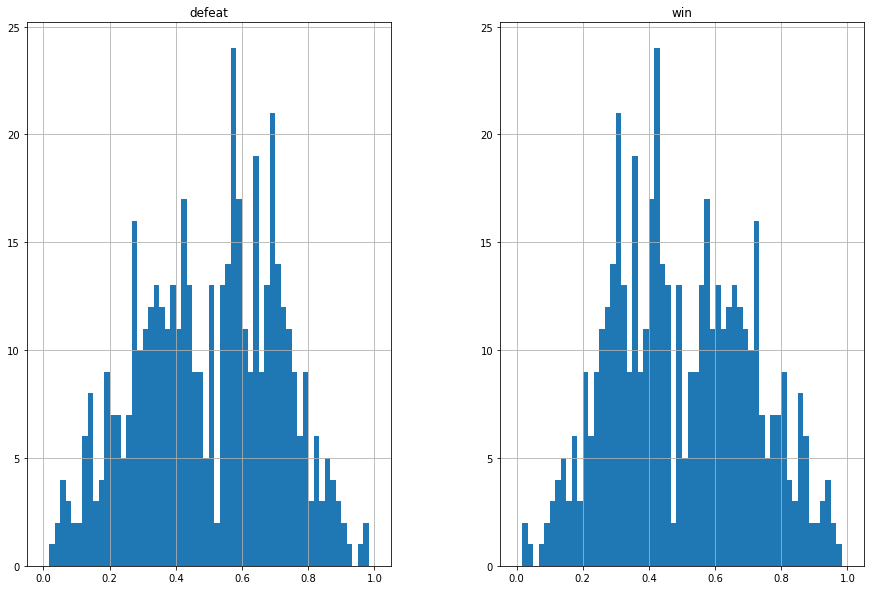

In [63]:
df_plot.hist(bins = 60, figsize=(15, 10), range=[0, 1])

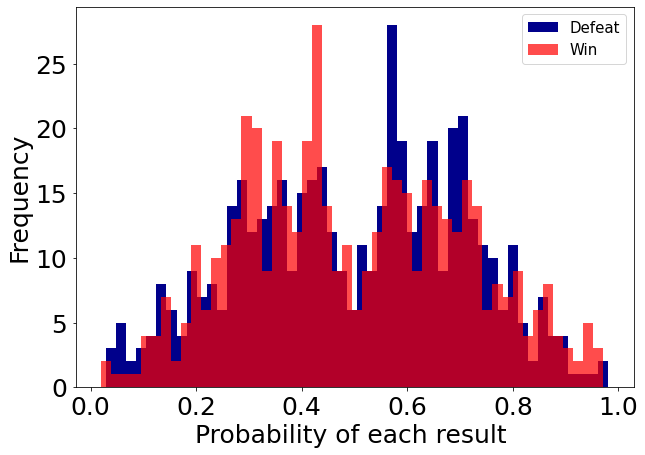

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(df_plot.iloc[:, 0], bins=50, label='Defeat', color='darkblue')
plt.hist(df_plot.iloc[:, 1], bins=50, label='Win', alpha=0.7, color='red')
plt.xlabel('Probability of each result ', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [65]:
y_labels = nn_result.predict(X_test)
plott = [y_test, np.concatenate(y_labels, axis=0 )]

16/16 [==============================] - 0s 1ms/step


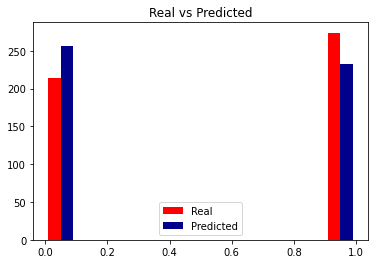

In [66]:
#Plot Real vs Predict
colors = ['red', 'darkblue']
labels = ['Real', 'Predicted']

plt.hist(plott, label=labels, color=colors, histtype='bar')
plt.title("Real vs Predicted")
plt.legend(loc='best')
plt.show()

In [67]:
# optimal treshhold

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
predictions_test = nn_result.predict(X_test)

false_pos_rate, true_pos_rate, proba = roc_curve(y_test, y_test_pred[:,1])

optimal_proba_cutoff = sorted(list(zip(np.abs(true_pos_rate - false_pos_rate), proba)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_test_pred[:,1]]

16/16 [==============================] - 0s 1ms/step


In [69]:
# optimal treshhold
optimal_proba_cutoff

0.49329492

In [70]:
print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_test, predictions_test), accuracy_score(y_test, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_test, predictions_test), precision_score(y_test, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_test, predictions_test), recall_score(y_test, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_test, predictions_test), f1_score(y_test, roc_predictions)))

Accuracy Score Before and After Thresholding: 0.6967213114754098, 0.7049180327868853
Precision Score Before and After Thresholding: 0.771551724137931, 0.7754237288135594
Recall Score Before and After Thresholding: 0.6532846715328468, 0.6678832116788321
F1 Score Before and After Thresholding: 0.7075098814229248, 0.7176470588235295
